In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'videogamesales.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First Few Rows of DataFrame:")
print(df.head())


First Few Rows of DataFrame:
              Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  \
0        Asteroids     2600  1980.0   Shooter       Atari      4.00      0.26   
1  Missile Command     2600  1980.0   Shooter       Atari      2.56      0.17   
2          Kaboom!     2600  1980.0      Misc  Activision      1.07      0.07   
3         Defender     2600  1980.0      Misc       Atari      0.99      0.05   
4           Boxing     2600  1980.0  Fighting  Activision      0.72      0.04   

   JP_Sales  Other_Sales  
0       0.0         0.05  
1       0.0         0.03  
2       0.0         0.01  
3       0.0         0.01  
4       0.0         0.01  


In [2]:
df['Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_sorted = df.sort_values(by='Global_Sales', ascending=False)
print("\nDataFrame Sorted by Global Sales:")
print(df_sorted.head())



DataFrame Sorted by Global Sales:
                          Name Platform    Year         Genre Publisher  \
6109                Wii Sports      Wii  2006.0        Sports  Nintendo   
122          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
8315            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
9743         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
705   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
6109     41.49     29.02      3.77         8.46         82.74  
122      29.08      3.58      6.81         0.77         40.24  
8315     15.85     12.88      3.79         3.31         35.83  
9743     15.75     11.01      3.28         2.96         33.00  
705      11.27      8.89     10.22         1.00         31.38  


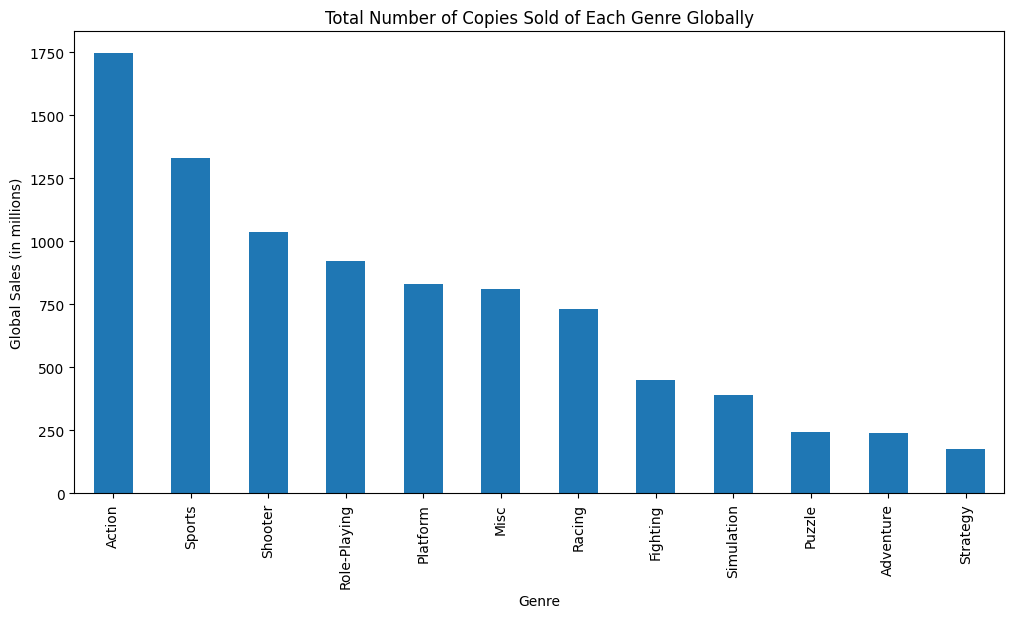

In [3]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Number of Copies Sold of Each Genre Globally')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()


In [4]:
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False, na=False)]
gta_filtered = gta_games[['Name', 'Platform', 'Year', 'EU_Sales', 'JP_Sales']]
gta_filtered['EU_JP_Sales_Sum'] = gta_filtered[['EU_Sales', 'JP_Sales']].sum(axis=1)
print("\nGrand Theft Auto Games Filtered DataFrame:")
print(gta_filtered)



Grand Theft Auto Games Filtered DataFrame:
                                                    Name Platform    Year  \
999                                     Grand Theft Auto       PS  1997.0   
1290                                  Grand Theft Auto 2       PS  1998.0   
1469      Grand Theft Auto: Mission Pack #1, London 1969       PS  1998.0   
2323                                Grand Theft Auto III      PS2  2001.0   
2805                         Grand Theft Auto: Vice City      PS2  2002.0   
3563                                Grand Theft Auto III       PC  2002.0   
3639   Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   
3688   Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003.0   
4356                         Grand Theft Auto: Vice City       PC  2003.0   
4405                       Grand Theft Auto: San Andreas      PS2  2004.0   
4704                                    Grand Theft Auto      GBA  2004.0   
5173              Grand Theft Au

C:\Users\77777\AppData\Local\Temp\ipykernel_9192\1284993441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_filtered['EU_JP_Sales_Sum'] = gta_filtered[['EU_Sales', 'JP_Sales']].sum(axis=1)


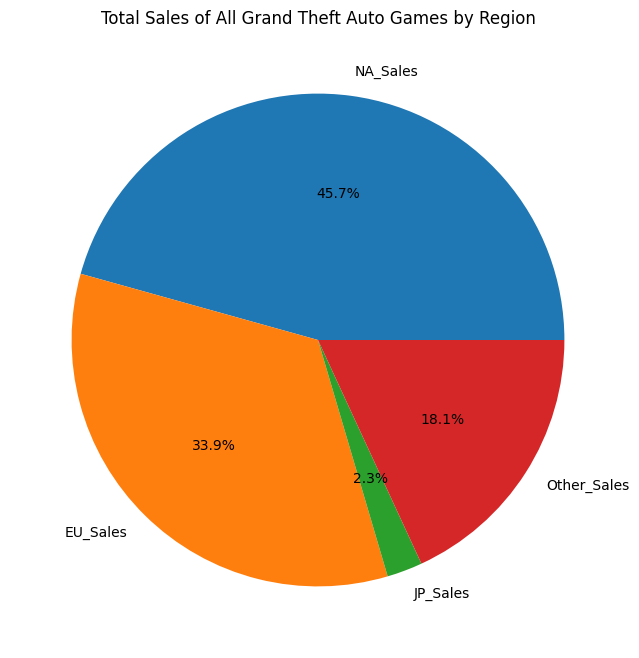

In [5]:
gta_total_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gta_total_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Total Sales of All Grand Theft Auto Games by Region')
plt.ylabel('')
plt.show()
